
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from plotnine import *
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [36]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1
...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0
269,57,0,0,140,241,1,123,0
270,45,1,3,110,264,1,132,0
271,68,1,0,144,193,1,141,0


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [37]:
X = ha.drop(columns=['cp','output'])
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

numeric_features = ['age', 'trtbps', 'chol', 'thalach']
categorical_features = ['sex', 'restecg']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


In [38]:
# Pipeline for KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter tuning for K
param_grid = {'knn__n_neighbors': range(1, 11)}
grid_search_knn = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

best_k = grid_search_knn.best_params_['knn__n_neighbors']
print(f"Best K for KNN: {best_k}")

knn_y_pred = grid_search_knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_y_pred))


Best K for KNN: 7
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.90      0.65        39
           1       0.00      0.00      0.00        13
           2       0.22      0.08      0.12        24
           3       0.00      0.00      0.00         6

    accuracy                           0.45        82
   macro avg       0.18      0.25      0.19        82
weighted avg       0.31      0.45      0.35        82



In [39]:
# Pipeline for LDA
lda_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])

lda_pipeline.fit(X_train, y_train)

lda_y_pred = lda_pipeline.predict(X_test)
print("LDA Classification Report:\n", classification_report(y_test, lda_y_pred))


LDA Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.62      0.52        39
           1       0.00      0.00      0.00        13
           2       0.25      0.25      0.25        24
           3       0.00      0.00      0.00         6

    accuracy                           0.37        82
   macro avg       0.17      0.22      0.19        82
weighted avg       0.28      0.37      0.32        82



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [40]:
# Decision Tree pipeline
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=3))
])

dt_pipeline.fit(X_train, y_train)

y_pred = dt_pipeline.predict(X_test)

print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.49      0.69      0.57        39
           1       0.00      0.00      0.00        13
           2       0.24      0.25      0.24        24
           3       0.00      0.00      0.00         6

    accuracy                           0.40        82
   macro avg       0.18      0.24      0.20        82
weighted avg       0.30      0.40      0.34        82



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


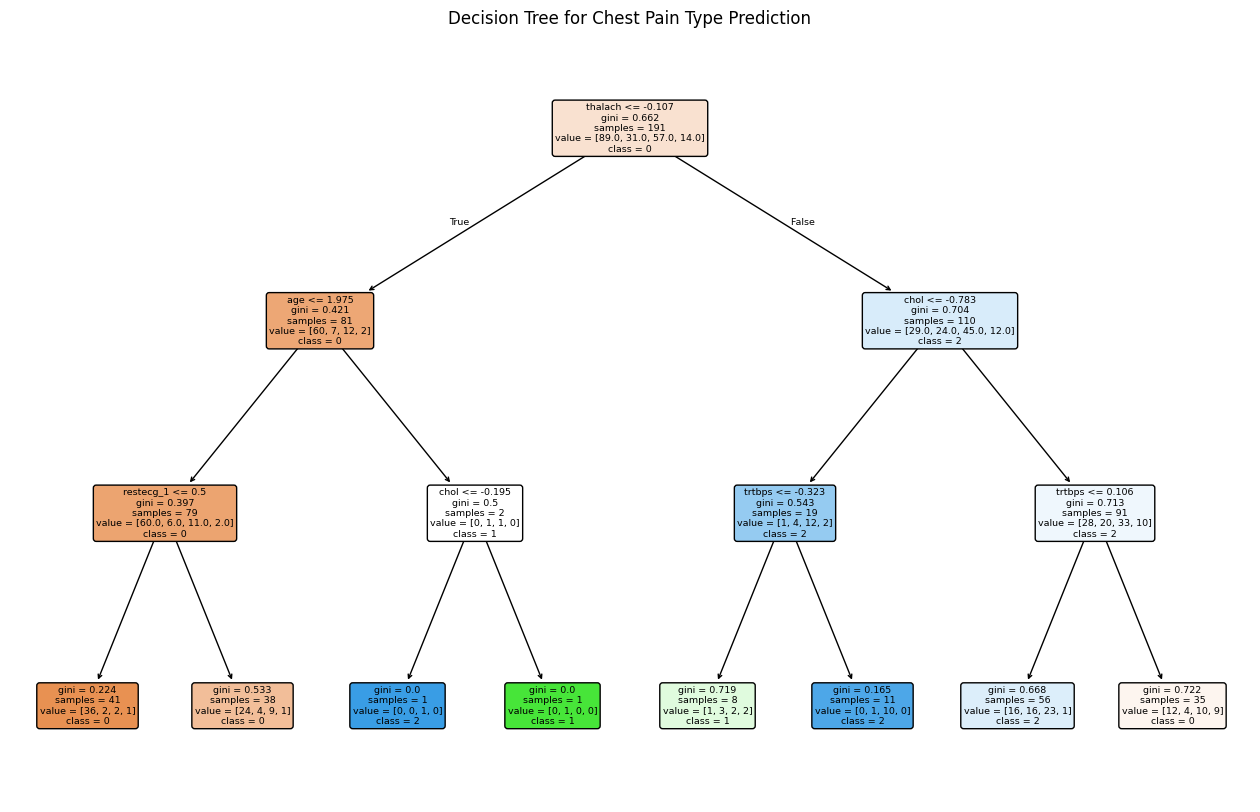

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract the trained Decision Tree model
dt_model = dt_pipeline.named_steps["classifier"]

plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=numeric_features + list(preprocessor.named_transformers_["cat"]
        .get_feature_names_out(categorical_features)),
    class_names=["0", "1", "2", "3"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Chest Pain Type Prediction")
plt.show()


The decision tree starts by checking the thalach value. If it's less than or equal to -0.107, the data moves left, where it then checks the restecg_1 value. If restecg_1 is less than or equal to 0.5, it stays on the left; otherwise, it goes right. On the other hand, if thalach is greater than -0.107, the tree checks the chol value. If chol is less than or equal to -0.783, it goes left; if not, it moves to the right. The tree is making these splits to group similar data together, with each decision helping to predict the class more accurately.

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [42]:
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)

ha.head()


,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_0,cp_is_1,cp_is_2,cp_is_3
0,63,1,3,145,233,0,150,1,0,0,0,1
1,37,1,2,130,250,1,187,1,0,0,1,0
2,56,1,1,120,236,1,178,1,0,1,0,0
3,57,0,0,120,354,1,163,1,1,0,0,0
4,57,1,0,140,192,1,148,1,1,0,0,0


In [43]:
# Initialize Logistic Regression with balanced class weight
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

def fit_and_evaluate_logreg(target_column):
    X = ha.drop(columns=['cp', 'cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3'])
    y = ha[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    return f1_score(y_test, y_pred)

f1_cp_is_0 = fit_and_evaluate_logreg('cp_is_0')
f1_cp_is_1 = fit_and_evaluate_logreg('cp_is_1')
f1_cp_is_2 = fit_and_evaluate_logreg('cp_is_2')
f1_cp_is_3 = fit_and_evaluate_logreg('cp_is_3')

print(f'F1 Score for cp_is_0: {f1_cp_is_0}')
print(f'F1 Score for cp_is_1: {f1_cp_is_1}')
print(f'F1 Score for cp_is_2: {f1_cp_is_2}')
print(f'F1 Score for cp_is_3: {f1_cp_is_3}')

print(f"\nThe OvR approach performed best for: Cp_0 with f1 score of  {f1_cp_is_0:.4f}")

F1 Score for cp_is_0: 0.75
F1 Score for cp_is_1: 0.4375
F1 Score for cp_is_2: 0.5909090909090909
F1 Score for cp_is_3: 0.26666666666666666

The OvR approach performed best for: Cp_0 with f1 score of  0.7500


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [44]:
# Function to calculate ROC-AUC for cp=0 vs another category
def calculate_roc_auc(data, category_to_compare):
    """
    Filters the dataset to include only cp=0 and the specified comparison category,
    trains a Logistic Regression model, and calculates the mean ROC-AUC using cross-validation.

    Parameters:
    - data: DataFrame containing the dataset.
    - category_to_compare: Chest pain category to compare with cp=0.

    Returns:
    - Mean ROC-AUC score for the comparison.
    """
    filtered_data = data[data["cp"].isin([0, category_to_compare])]

    X = filtered_data[["age", "chol"]]
    y = filtered_data["cp"]

    logistic_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("logistic_model", LogisticRegression(max_iter=200, random_state=42, class_weight="balanced", C=0.1))
    ])

    roc_auc_scores = cross_val_score(logistic_pipeline, X, y, cv=5, scoring="roc_auc")
    return roc_auc_scores.mean()

In [45]:
roc_auc_0_vs_1 = calculate_roc_auc(ha, 1)
roc_auc_0_vs_2 = calculate_roc_auc(ha, 2)
roc_auc_0_vs_3 = calculate_roc_auc(ha, 3)

print(f"ROC-AUC for cp=0 vs cp=1: {roc_auc_0_vs_1:.4f}")
print(f"ROC-AUC for cp=0 vs cp=2: {roc_auc_0_vs_2:.4f}")
print(f"ROC-AUC for cp=0 vs cp=3: {roc_auc_0_vs_3:.4f}")

roc_auc_results = {"0_vs_1": roc_auc_0_vs_1, "0_vs_2": roc_auc_0_vs_2, "0_vs_3": roc_auc_0_vs_3}
best_comparison = max(roc_auc_results, key=roc_auc_results.get)
print(f"\nThe OvO approach performed best for: {best_comparison} with ROC-AUC = {roc_auc_results[best_comparison]:.4f}")

ROC-AUC for cp=0 vs cp=1: 0.6029
ROC-AUC for cp=0 vs cp=2: 0.5827
ROC-AUC for cp=0 vs cp=3: 0.3868

The OvO approach performed best for: 0_vs_1 with ROC-AUC = 0.6029
